<a href="https://colab.research.google.com/github/lisatwyw/geopy/blob/main/open_street_map_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Open street map API </h1>

# Objectives of this notebook

- Conda install via ```condacolab```
- Use OSM API to...  
  - download geo dataframe from a **geocode** query
  - calculate shortest path between two nodes on a graph

  
## Resources

Older data may be downloaded at various sites. For instance:
- [BC, Canada](https://download.geofabrik.de/north-america/canada/british-columbia.html#)
    - Years available: 2014, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024
- [Europe](https://download.geofabrik.de/europe.html)  
- etc.


# Install ```osmnx``` through ```condacolab```  

In [ ]:
!pip install -q condacolab

import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [ ]:
#!conda create -n ox -c conda-forge --strict-channel-priority osmnx
!mamba install osmnx


Looking for: ['osmnx']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   6%
conda-forge/noarch     2%[+] 0.3s
conda-forge/linux-64  15%
conda-forge/noarch    36%[+] 0.4s
conda-forge/linux-64  20%
conda-forge/noarch    58%[+] 0.5s
conda-forge/linux-64  25%
conda-forge/noarch    70%[+] 0.6s
conda-forge/linux-64  29%
conda-forge/noarch    81%[+] 0.7s
conda-forge/linux-64  39%
conda-forge/noarch    92%conda-forge/noarch                                
[+] 0.8s
conda-forge/linux-64  44%[+] 0.9s
conda-forge/linux-64  53%[+] 1.0s
conda-forge/linux-64  63%[+] 1.1s
conda-forge/linux-64  73%[+] 1.2s
conda-forge/linux-64  82%[+] 1.3s
conda-forge/linux-64  92%conda-forge/linux-64                              

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  Updating specs:

   - osmnx
   - ca-certificates
   - certifi
   - openssl


  Package         

# Import packages

In [ ]:
import networkx as nx
import osmnx as ox
from IPython.display import Image

ox.__version__

'1.9.3'

# Query and configuration settings

In [ ]:
k = 'University of British Columbia, BC'

In [ ]:
# specify that we're retrieving building features from OSM
tags = {"building": True}

img_folder = "images"
extension = "png"
size = 240

In [ ]:
%%time
weight = "length"
G = ox.graph_from_place( k , network_type="drive")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 685 ms, sys: 16.2 ms, total: 701 ms
Wall time: 2.07 s


In [ ]:
ox.graph_to_gdfs(G, nodes=False).explore()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

# Building footprints

CPU times: user 1.28 s, sys: 151 ms, total: 1.43 s
Wall time: 1.62 s


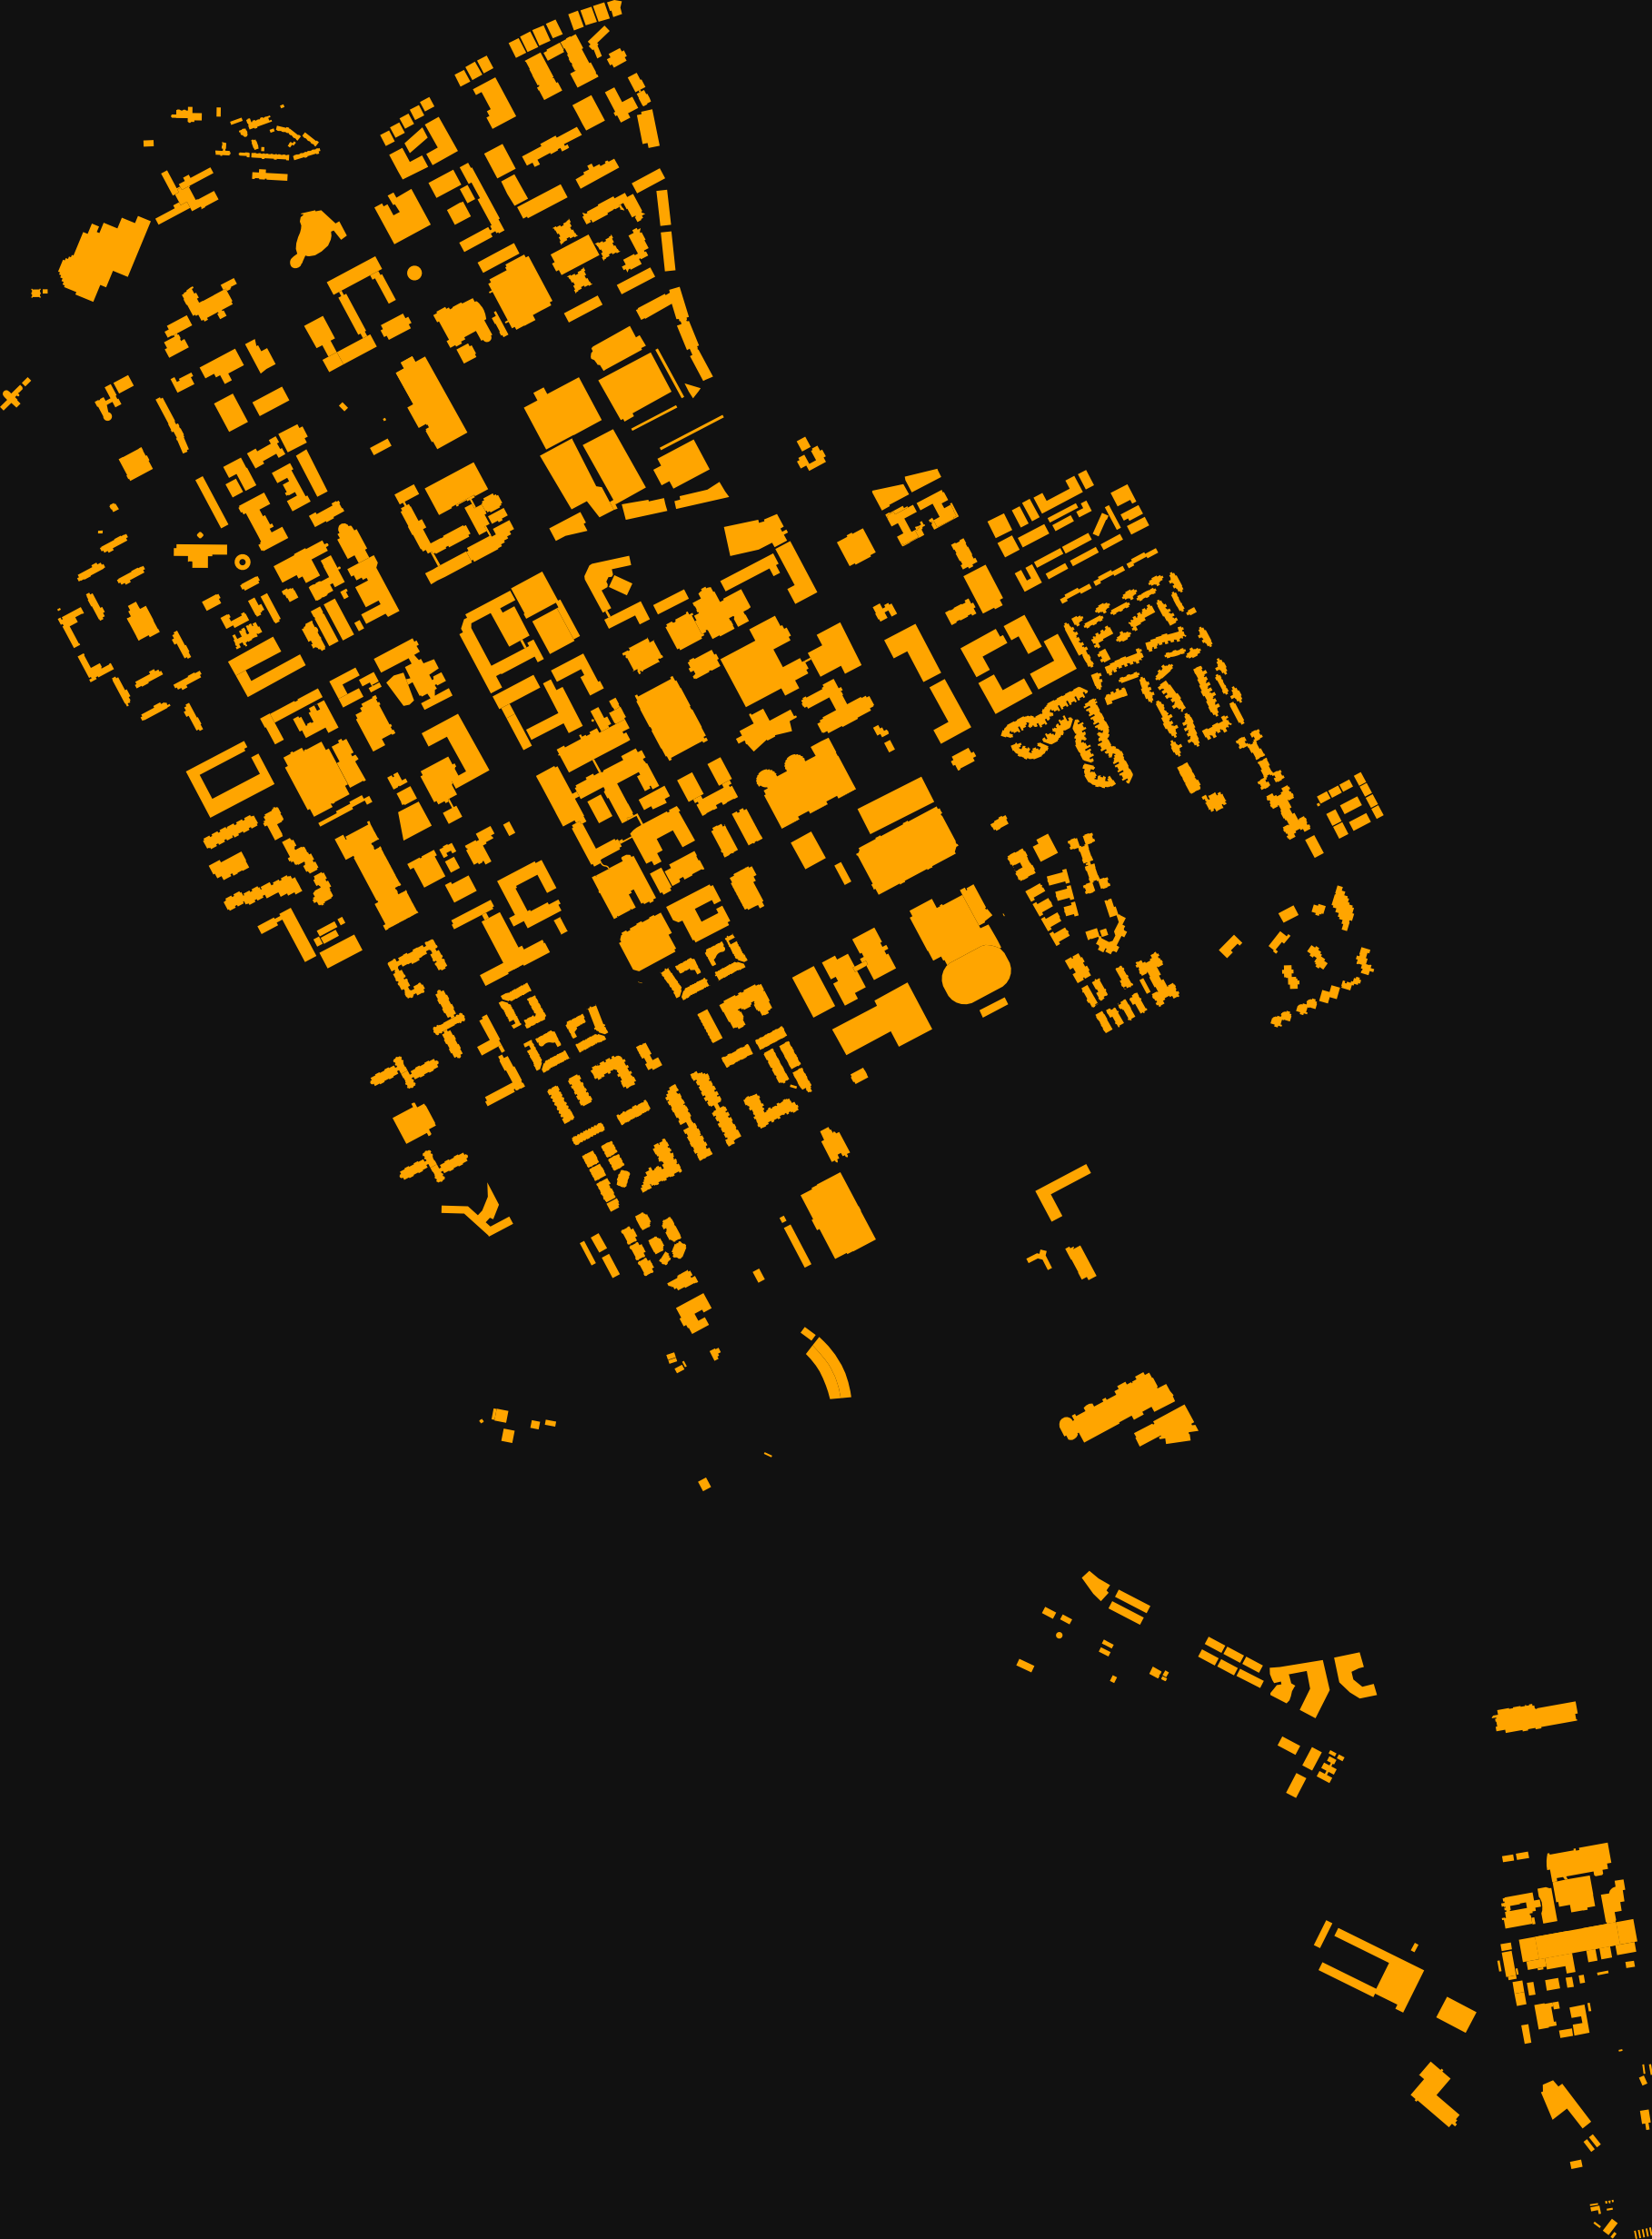

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()


In [ ]:
%%time
gdf = ox.features_from_place( k, tags)
gdf_proj = ox.projection.project_gdf(gdf)

fp = f"./{img_folder}/piedmont_bldgs.{extension}"
fig, ax = ox.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True)

Image(fp, height=size, width=size)

# Calculate shortest path between two graph nodes

In [ ]:
# explore a route interactively

G = ox.graph_from_place( k, network_type="drive")
orig = list(G.nodes)[0]
dest = list(G.nodes)[111]
route = ox.shortest_path(G, orig, dest, weight=weight)

route_edges = ox.routing.route_to_gdf(G, route, weight=weight)
route_edges.explore(tiles="cartodbpositron", style_kwds={"weight": 5})

In [ ]:
G = ox.graph_from_place( k, network_type="drive")
orig = list(G.nodes)[0]
dest = list(G.nodes)[-1]
route = ox.shortest_path(G, orig, dest, weight=weight)

route_edges = ox.routing.route_to_gdf(G, route, weight=weight)
route_edges.explore(tiles="cartodbpositron", style_kwds={"weight": 5})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip freeze > requirements.txt
!cat requirements.txt

affine @ file:///home/conda/feedstock_root/build_artifacts/affine_1674245120525/work
archspec @ file:///home/conda/feedstock_root/build_artifacts/archspec_1699370045702/work
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1704011227531/work
boltons @ file:///home/conda/feedstock_root/build_artifacts/boltons_1703154663129/work
branca @ file:///home/conda/feedstock_root/build_artifacts/branca_1714071803448/work
Brotli @ file:///home/conda/feedstock_root/build_artifacts/brotli-split_1695989787169/work
certifi @ file:///home/conda/feedstock_root/build_artifacts/certifi_1707022139797/work/certifi
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1696001684923/work
charset-normalizer @ file:///home/conda/feedstock_root/build_artifacts/charset-normalizer_1698833585322/work
click @ file:///home/conda/feedstock_root/build_artifacts/click_1692311806742/work
click-plugins==1.1.1
cligj @ file:///home/conda/feedstock_root/build_artifacts/cligj_1633637764473/work
colorama

---
© 2024 [lisatwyw@BCCDC-DSI](https://bccdc-dsi.github.io/Python-Git-workshop/). With the exception of pasted graphics, where the source is noted, this work is licensed under a Creative Commons Attribution License CC-BY 4.0 <a target="_blank" href="https://creativecommons.org/licenses/by-nc/4.0/"><img width="60px" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc.png" /></a>. All code contained herein is licensed under <a target="_blank" href="https://opensource.org/license/mit/"><img width="70px" src="https://img.shields.io/badge/license-MIT-green" /></a>.
